# Introduction

This goal of this project is to analyse academic performance  data uploaded to Kaggle (https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data) to demonstrate my EDA skills. I also want to explore ff the statistical conclusions of this analysis are in line with some of the concepts and ideas discussed in a paper I wrote about learning mathematics (also linked in my GitHub).

This project will scope, analyse, prepare, plot data, and seek to explain the findings from the analysis. I aim to investigate the variables that impact a students' success when it comes to exam score; such as socioeconomic factors, gender and lifestyle factors. 

As I conduct my analysis I will pose some specific questions I will seek to answer using data.

**Data sources:**
 `StudentPerformanceFactors.csv` 

## Scoping

It's beneficial to create a project scope. The 4 sections were created below to help guide the project's process and progress. The first section is the project goals, this section will define the high-level objectives and set the intentions for this project. The next section is the data, it needs to be checked if project goals can be met with the available data. Thirdly, the analysis will have to be thought through, which includes the methods and questions that are aligned with the project goals. Lastly, evaluation will help us build conclusions and findings from our analysis.

### Project Goals

In this project the perspective will be through then lens of a mathematics graduate who wants to investigate what makes a successful student (in exams). I also want to see if the conclusions I made in my academic essay can be generalised to wider student populations with statistical evidence. Some of the questions I will seek to answer are:

- What socioeconomic factors have the most impact on exam score?
- How much of an impact revision and preparation has on exam score?
- What is the distribution of scores, could this be used to inform us of weakness in topics of the population?

### Data

This project has one data set as a `csv` file. This dataset contains detailed records of exam scoress acorss reading, writing and maths. It also contains other variables such as lunch, race and level of parental education which could all be contributing factors to a students exam score.

### Analysis

In this section, descriptive statistics and data visualisation techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include: 

1. Distributions
1. Counts
1. Relationship between score and socioeconomic factors
1. Score trends
1. Siginificance tests

It is important to conduct exploratory data analysis for the following reasons:
 1. Maximise insight into the data
 1. Understand connections between variables 
 1. Extract the important/significant vairables 
 1. Detect anomalies
 1. Test underlying assumptions


### Evaluation

Lastly, I will revisit the goals and check if the output of the analysis corresponds to the questions first set to be answered (in the goals section). This section will also reflect on what has been learned through the process, and if any of the questions were unable to be answered. This will also include limitations or if any of the analysis could have been done using different methodologies.

<h3>Import modules</h3>

In [100]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

<h3>Import the data and obtain data characteristics</h3>

In [101]:
studentsPerformance_df = pd.read_csv("/Users/jai/Documents/GitHub/EDARepo/academicPerformanceEDA/StudentPerformanceFactors.csv")
display(studentsPerformance_df.head())

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [102]:
studentsPerformance_df.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

The data consists of 6607 observations, across 20 different variables.

In [103]:
print(f"The data shape is: {studentsPerformance_df.shape}")

The data shape is: (6607, 20)


<h3>Missing data check</h3>

In [104]:
studentsPerformance_df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Out of 6607 observations there are some missing value is the columns for <code> Teacher_Quality, Parental_Education_Level and Distance_From_Home</code>. To deal with the missing data I could consider imputation, but since the number of missing observations is relatively low in comparison to the population of the data I am happy to drop all rows with missing data. The risk of introducing bias in this case is low.


Note:
Before I do drop the tables I want to take a look at the missing data entries to check for potential reasons as to why it is missing.

<code>Teacher_Quality</code> - potential reasons for missig data is that it was never filled in at random. The data is MCAR in which case it is sensible to delete the rows to avoid introducing bias.

<code>Parental_Education_Level</code> - Potential reasons for missing data is tht there was no appropriate category, for example people who did not finish High School. This is likely to have an impact on observed data (test scores) so I am going to treat it as MAR. In this case because there is no category to accurately represent this scenario I am going to delete the rows. 

<code>Distance_From_Home</code> - I am going to treat this data as MCAR and undertake listewise deletion.

In [105]:
studentsPerformance_df.Teacher_Quality.value_counts()

Medium    3925
High      1947
Low        657
Name: Teacher_Quality, dtype: int64

In [106]:
studentsPerformance_df.Parental_Education_Level.value_counts()

High School     3223
College         1989
Postgraduate    1305
Name: Parental_Education_Level, dtype: int64

In [107]:
studentsPerformance_df.Distance_from_Home.value_counts()

Near        3884
Moderate    1998
Far          658
Name: Distance_from_Home, dtype: int64

<h2>Variable Analysis</h2>

I am going to take a look into the individual variables, identify distributions and summary statistics of each variable.

The summary statisics give us an insight into the central measures of the variables that impact test scores. 

Care needs to be taken to treat the some of the integer variables as categorical.
 1. <code>Sleep_Hours</code>
 2. <code> Tutoring_Sessions</code>
 3. <code> Physical_Activity</code>

In [108]:
studentsPerformance_df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [109]:
# To describe the qaulitative categorical variables
studentsPerformance_df.describe(include='object')

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
count,6607,6607,6607,6607,6607,6607,6529,6607,6607,6607,6517,6540,6607
unique,3,3,2,3,2,3,3,2,3,2,3,3,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
freq,3362,3319,3938,3351,6108,2672,3925,4598,2638,5912,3223,3884,3814


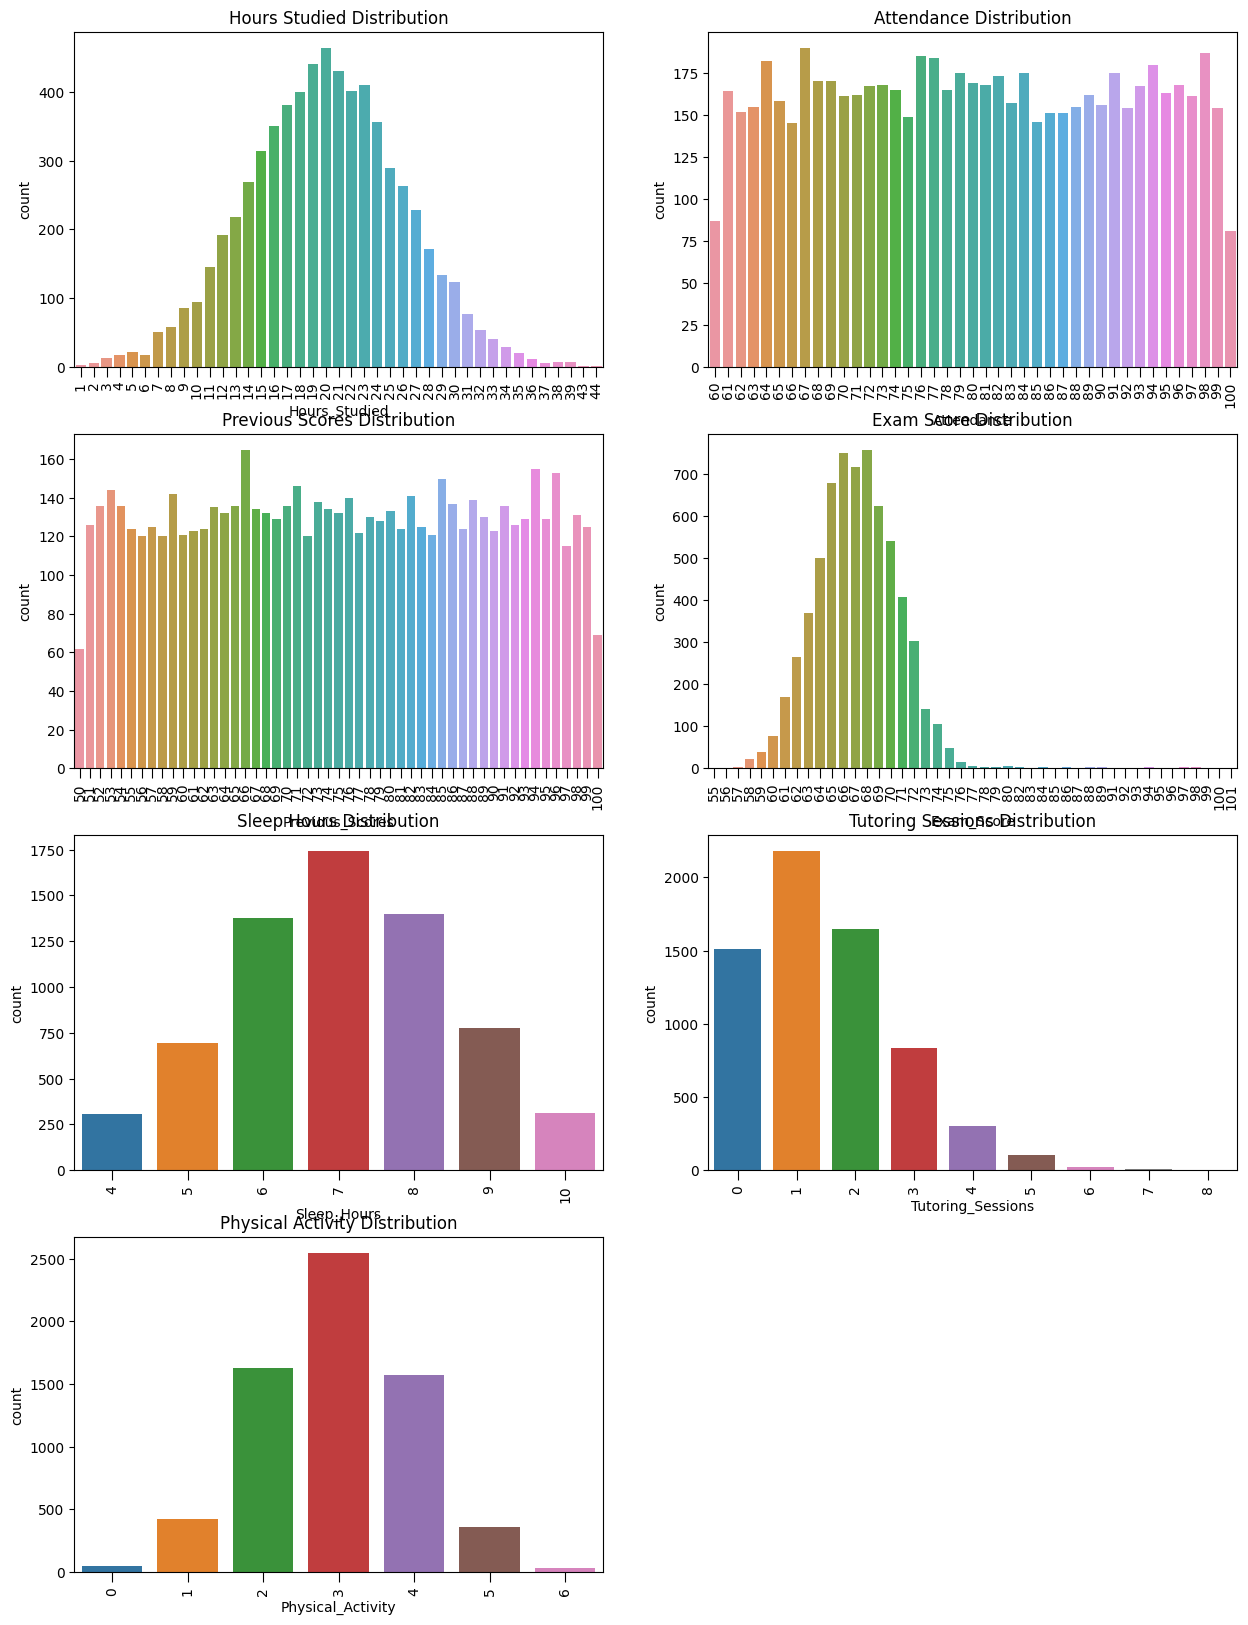

In [111]:
# Distribution of each of the integer variables 

# Take input as a list of the numerical variables. Note they are discrete so a countplot is best.
numericalVariables =["Hours_Studied", "Attendance", "Previous_Scores",  "Exam_Score", "Sleep_Hours", "Tutoring_Sessions", "Physical_Activity"]

def numericalDistribution(numericalVariable):
    fig, axes = plt.subplots(4,2, figsize=(15,20))
    axes = axes.flatten()
    for i, numericalVariable in enumerate(numericalVariables):
        sns.countplot(data=studentsPerformance_df, x=studentsPerformance_df[numericalVariable],  ax=axes[i])
        title = numericalVariable.replace("_", " ")
        axes[i].set_title(f"{title} Distribution")
        axes[i].tick_params(axis='x', rotation=90, size=7)
    axes.flat[-1].set_visible(False)
    plt.show()

numericalDistribution(numericalVariables)

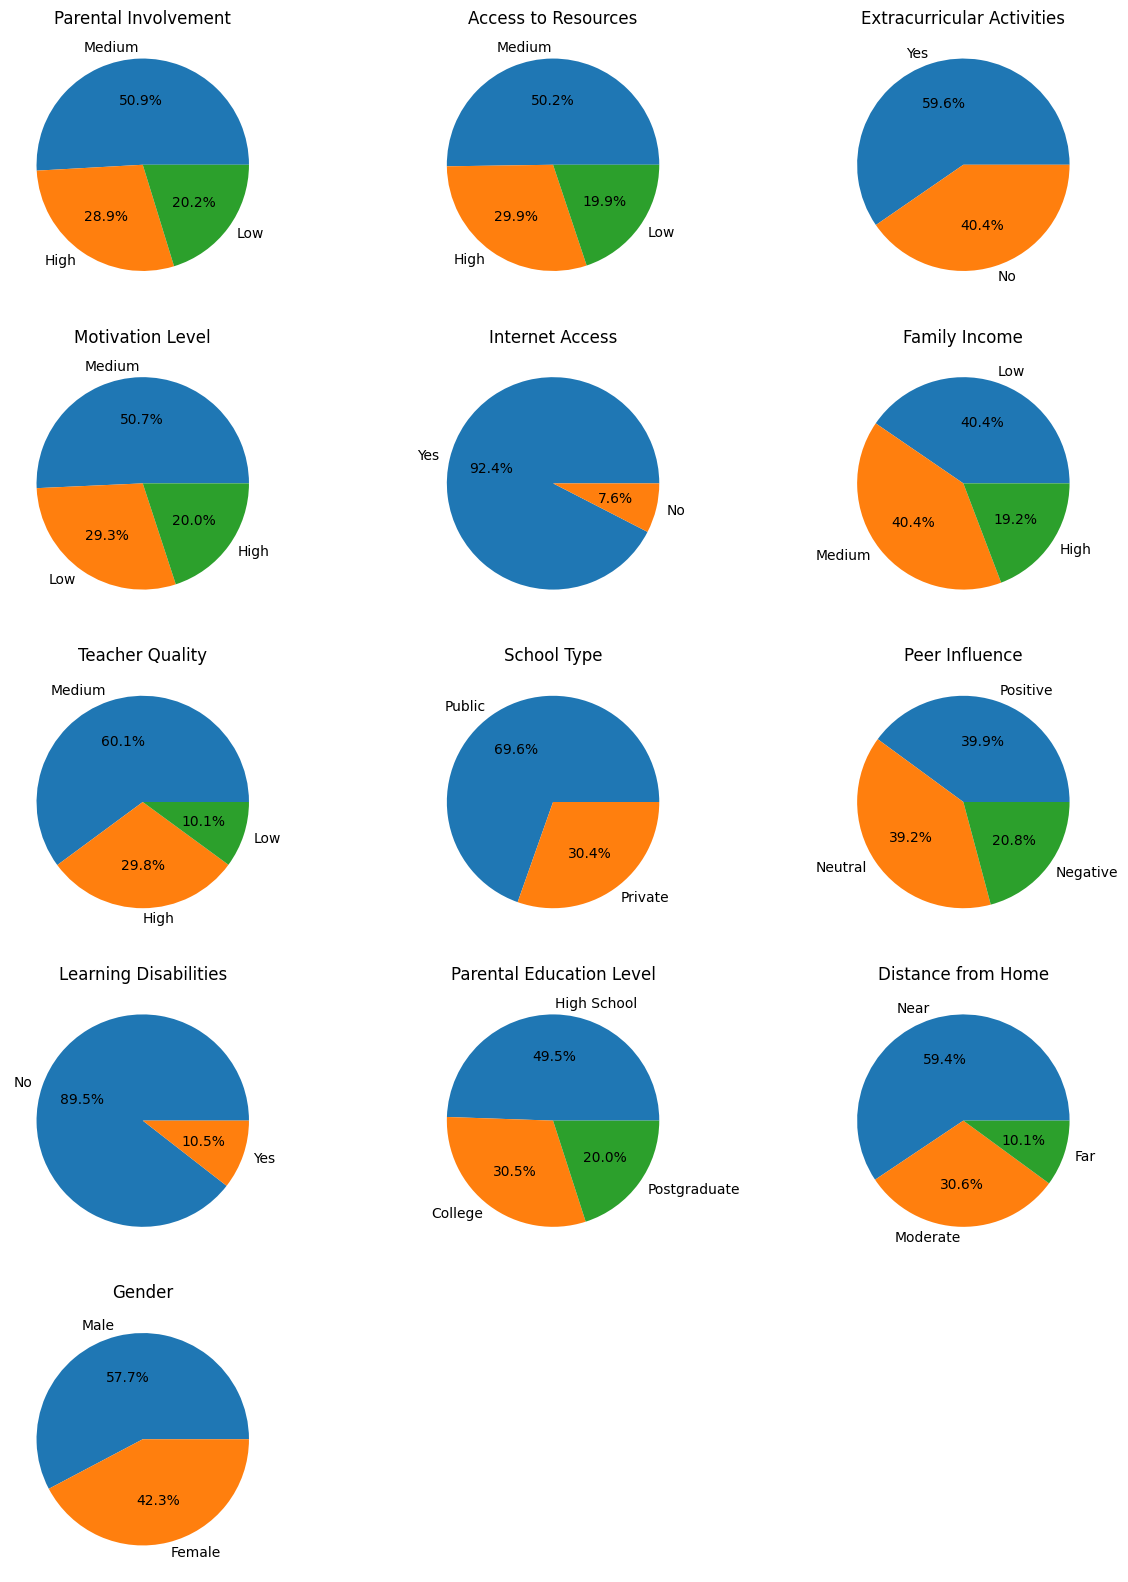

In [ ]:
categoricalVariables = ["Parental_Involvement", "Access_to_Resources", "Extracurricular_Activities", "Motivation_Level", "Internet_Access", "Family_Income", "Teacher_Quality", "School_Type", "Peer_Influence", "Learning_Disabilities", "Parental_Education_Level", "Distance_from_Home", "Gender"]

def categoricalDistribution(categoricalVariables):
    fig, axes = plt.subplots(5, 3, figsize=(15, 20))  
    axes = axes.flatten() 
    
    for i, categoricalVariable in enumerate(categoricalVariables):
        studentsPerformance_df[categoricalVariable].value_counts().plot.pie(autopct="%1.1f%%", ax=axes[i])
        axes[i].set_title(categoricalVariable.replace("_", " "))
        axes[i].set_ylabel("")  # Remove y-axis labels for clarity
    axes.flat[-1].set_visible(False)
    axes.flat[-2].set_visible(False)
    plt.show()

categoricalDistribution(categoricalVariables)
